In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm

## Average SAT Scores for NYC Public Schools, 2014-15

In [107]:
sat = pd.read_csv('Tables/NYC_SAT_Scores.csv').dropna()

In [3]:
sat['Average Score (SAT Total)'] = sat['Average Score (SAT Math)'] + sat['Average Score (SAT Reading)']

In [90]:
sat.head()

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested,Average Score (SAT Total),Black/Hispanic Majority,resid
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,13.30%,18.00%,38.50%,657.0,601.0,601.0,91.00%,1258.0,no,43.401870
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,38.50%,41.30%,5.90%,395.0,411.0,387.0,78.90%,806.0,yes,-24.615360
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,28.20%,56.90%,8.60%,418.0,428.0,415.0,65.10%,846.0,yes,-18.971713
5,02M545,High School for Dual Language and Asian Studies,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,3.10%,5.50%,88.90%,613.0,453.0,463.0,95.90%,1066.0,no,150.504238
6,01M292,Henry Street School for International Studies,Manhattan,M056,220 Henry Street,Manhattan,NY,10002,40.71376,-73.98526,...,24.40%,56.60%,13.20%,410.0,406.0,381.0,59.70%,816.0,yes,-4.510550


In [34]:
sat.describe()

,Zip Code,Latitude,Longitude,Student Enrollment,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Average Score (SAT Total),resid
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,10736.066845,40.742754,-73.923427,756.459893,432.719251,424.342246,418.286096,857.061497,-0.518034
std,537.245046,0.082434,0.071961,774.287044,71.916833,61.884529,64.548388,131.386824,27.019079
min,10002.000000,40.528230,-74.192150,142.000000,317.000000,302.000000,284.000000,632.000000,-66.160371
25%,10306.000000,40.684780,-73.979260,397.250000,386.000000,386.000000,382.000000,774.000000,-17.735891
50%,10472.000000,40.739755,-73.927510,482.500000,414.000000,412.500000,402.500000,823.000000,-4.835461
75%,11217.000000,40.820995,-73.887532,660.500000,457.250000,444.500000,436.000000,899.750000,10.124159
max,11694.000000,40.888370,-73.726910,5447.000000,754.000000,697.000000,693.000000,1451.000000,151.229291


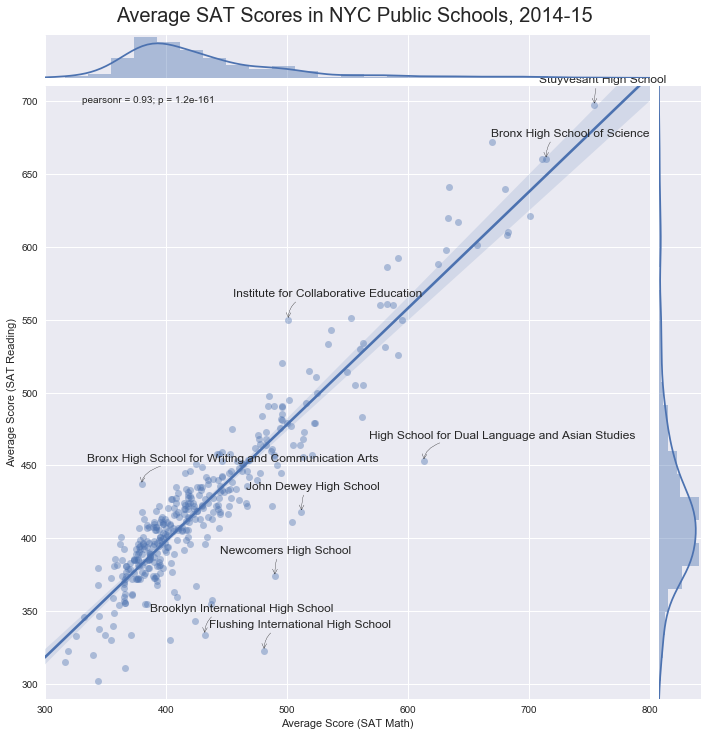

In [80]:
a = sns.jointplot(x='Average Score (SAT Math)', y='Average Score (SAT Reading)', data=sat, 
                  size=10, ratio=12, kind='reg', 
                  xlim=(300, 800), ylim=(290, 710), 
                  scatter_kws={'alpha':0.4})

# create SAT Reading vs Math residual column
model = sm.OLS(sat['Average Score (SAT Math)'], sat['Average Score (SAT Reading)'])
sat['resid'] = model.fit().resid
head = sat.sort_values(by=['resid'], ascending=[False]).head(5)
tail = sat.sort_values(by=['resid'], ascending=[False]).tail(2)
top_sat = sat.sort_values(by=['Average Score (SAT Total)'], ascending=[False]).head(2)

def ann(row):
    ind = row[0]
    r = row[1]
    plt.gca().annotate(r['School Name'], 
                       xy=(r["Average Score (SAT Math)"], r["Average Score (SAT Reading)"]), 
                       xytext=(-55,23) , 
                       textcoords ="offset points", 
                       arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"))

for row in head.iterrows():
    ann(row)
for row in tail.iterrows():
    ann(row)
for row in top_sat.iterrows():
    ann(row)
    
plt.figtext(0.5, 1, 'Average SAT Scores in NYC Public Schools, 2014-15', fontsize=20, ha='center')

plt.show()

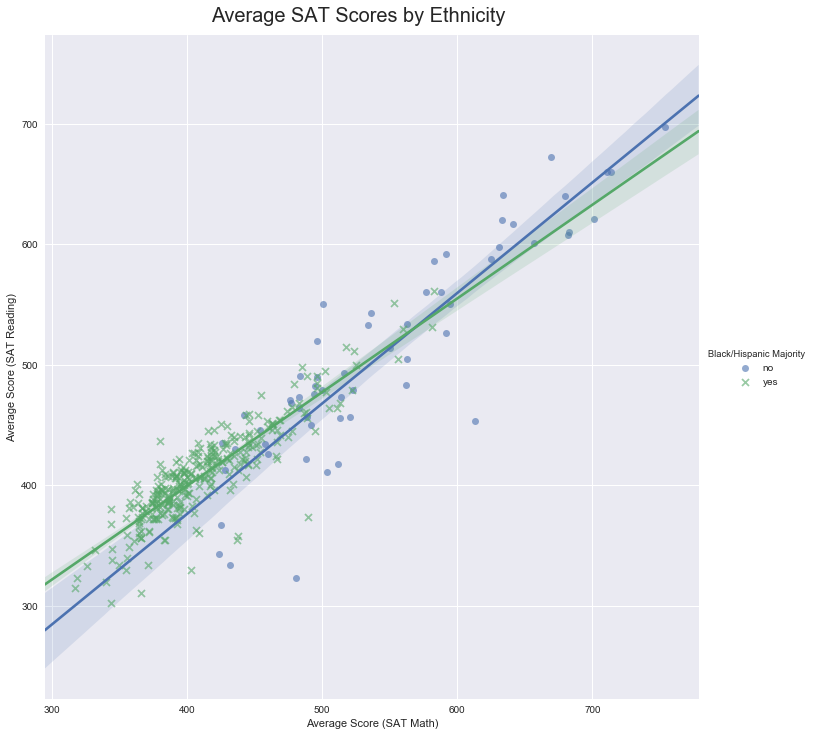

In [77]:
# Combine percent Black and Hispanic percentages into one column
sat['Black/Hispanic Majority'] = (sat['Percent Hispanic'].replace('%','',regex=True).astype('float')/100) + (sat['Percent Black'].replace('%','',regex=True).astype('float')/100)

# If Black/Hispanic percentage is over 50%, label as yes/no minority majority
sat['Black/Hispanic Majority'] = np.where(sat['Black/Hispanic Majority']>=0.50, 'yes', 'no')

sns.lmplot(x='Average Score (SAT Math)', 
           y='Average Score (SAT Reading)', 
           data=sat, 
           hue='Black/Hispanic Majority', 
           markers=['o', 'x'], 
           size=10,
           scatter_kws={'alpha':0.6})

plt.figtext(0.45, 1, 'Average SAT Scores by Ethnicity', fontsize=20, ha='center')

plt.show()

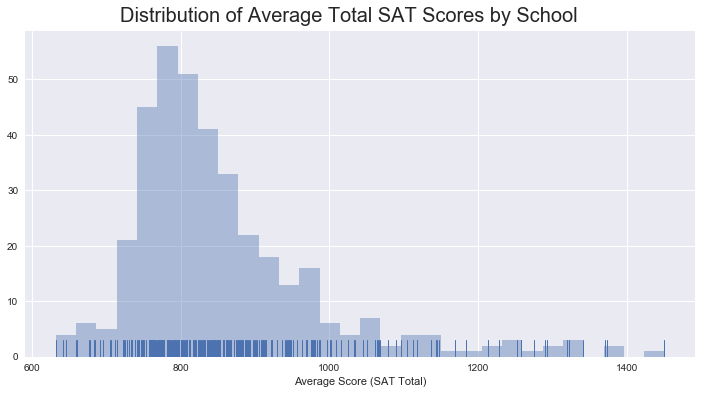

In [76]:
plt.figure(figsize=(12,6))
sns.distplot(sat['Average Score (SAT Total)'], kde=False, bins=30)
sns.rugplot(sat['Average Score (SAT Total)'])

plt.figtext(0.5, 0.9, 'Distribution of Average Total SAT Scores by School', fontsize=20, ha='center')
plt.show()

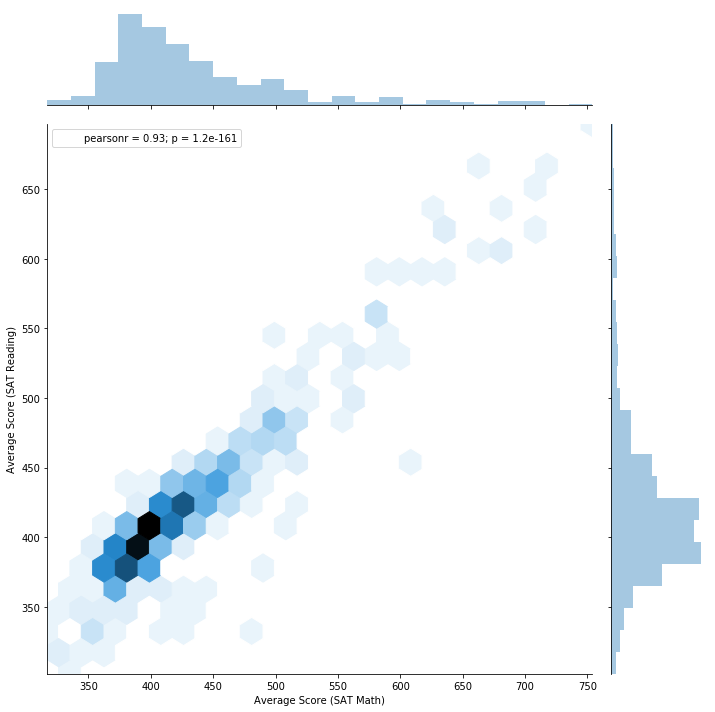

In [96]:
sns.jointplot(x='Average Score (SAT Math)', 
              y='Average Score (SAT Reading)', 
              data=sat, size=10, kind='hex', bins=40)

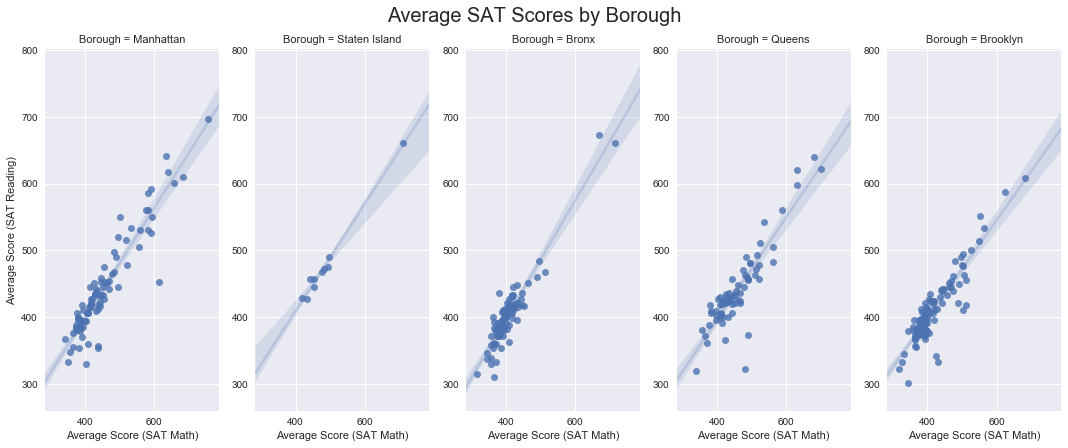

In [84]:
sns.lmplot(x='Average Score (SAT Math)', y='Average Score (SAT Reading)', data=sat, col='Borough',
           aspect=0.5, size=6, line_kws={'alpha':0.2})
plt.figtext(0.5, 1, 'Average SAT Scores by Borough', fontsize=20, ha='center')
plt.show()

Text(0.5,1,'Distribution of Average Scores by Borough')

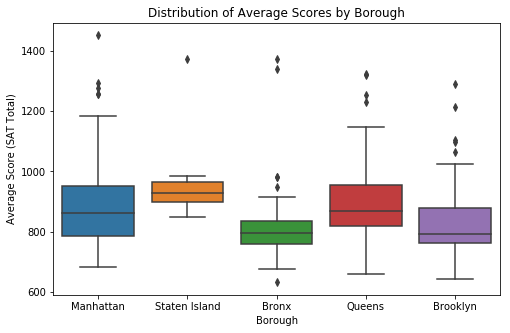

In [99]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Borough', y='Average Score (SAT Total)', data=sat)
plt.title('Distribution of Average Scores by Borough')

Text(0.5,1,'Schools Represented by Boroughs')

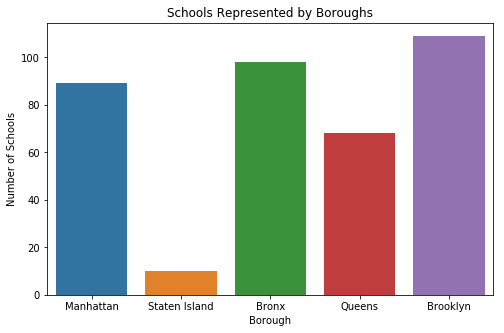

In [100]:
plt.figure(figsize=(8,5))
sns.countplot(x='Borough', data = sat)
plt.xlabel('Borough'), 
plt.ylabel('Number of Schools')
plt.title('Schools Represented by Boroughs')

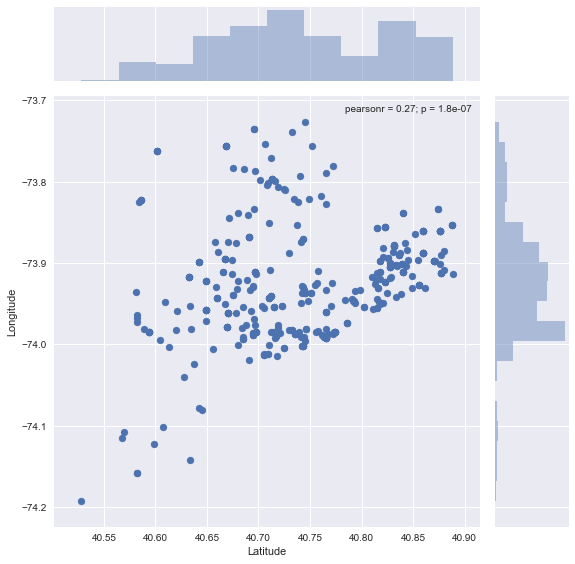

In [85]:
sns.jointplot(x='Latitude', y='Longitude', data=sat, size=8)